In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样
import cv2

In [2]:
# 准备数据集
data_path='E:\PyProjects\DataSet\FireAI/data_multivar.txt'
df=pd.read_csv(data_path,header=None)
# print(df.head())
# print(df.info()) # 查看数据信息，确保没有错误
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
# print(dataset_X.head())
print(dataset_X.info())
print('-'*100)
print(dataset_y.head())
dataset_X=dataset_X.values
dataset_y=dataset_y.values # 此处是没有标记，故而相当于没有dataset_y
# print(dataset_X.shape) # (400, 2)
# print(dataset_y.shape) # (400,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
0    400 non-null float64
1    400 non-null float64
dtypes: float64(2)
memory usage: 6.3 KB
None
----------------------------------------------------------------------------------------------------
0    2
1    3
2    1
3    2
4    1
Name: 2, dtype: int64


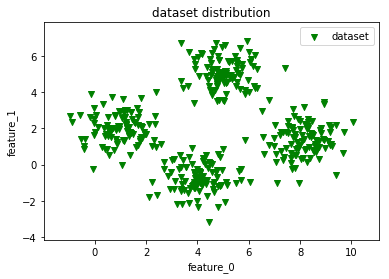

In [3]:
# 无标签数据集可视化，将第一列feature作为X，第二列feature作为y
def visual_2D_dataset_dist(dataset):
    '''将二维数据集dataset显示在散点图中'''
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    X=dataset[:,0]
    Y=dataset[:,1]
    plt.scatter(X,Y,marker='v',c='g',label='dataset')
    
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    plt.title('dataset distribution')
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.legend()
    
visual_2D_dataset_dist(dataset_X)

In [4]:
# 定义一个k-means对象
from sklearn.cluster import KMeans
kmeans=KMeans(init='k-means++',n_clusters=4,n_init=10)
# 这几个参数是初始化设定的，其中n_clusters是从二维散点图中看出大概有4个族群
kmeans.fit(dataset_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

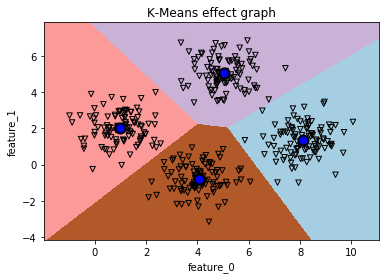

In [5]:
def visual_kmeans_effect(k_means,dataset):
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    X=dataset[:,0]
    Y=dataset[:,1]
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    X_values,Y_values=np.meshgrid(np.arange(X_min,X_max,0.01),
                                  np.arange(Y_min,Y_max,0.01))
    # 预测网格点的标记
    predict_labels=k_means.predict(np.c_[X_values.ravel(),Y_values.ravel()])
    predict_labels=predict_labels.reshape(X_values.shape)
    plt.figure()
    plt.imshow(predict_labels,interpolation='nearest',
               extent=(X_values.min(),X_values.max(),
                       Y_values.min(),Y_values.max()),
               cmap=plt.cm.Paired,
               aspect='auto',
               origin='lower')
    
    # 将数据集绘制到图表中
    plt.scatter(X,Y,marker='v',facecolors='none',edgecolors='k',s=30)
    
    # 将中心点回执到图中
    centroids=k_means.cluster_centers_
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',
                s=100,linewidths=2,color='k',zorder=5,facecolors='b')
    plt.title('K-Means effect graph')
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.show()
    
visual_kmeans_effect(kmeans,dataset_X)